# Analysis of FordGo Bike trends


January 2018 to April 20019


- Nildri Ghosh

## Inroduction


FordGo bike now Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.


I selected Ford GoBike dataset in order to investigate bike hiring by different people. There are a lot of different variables and our main focus is to define the most common variables which effect the bike hiring program

In [1]:
# importing necessary libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import radians, sin, cos, acos
import requests
import zipfile
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgo_master_clean.csv')

## Gender Distribution of users

Male in subscriber user type tend to have more rides than the male in customer, female and other have few rides. We can predict that customers are mainly casual visiters.

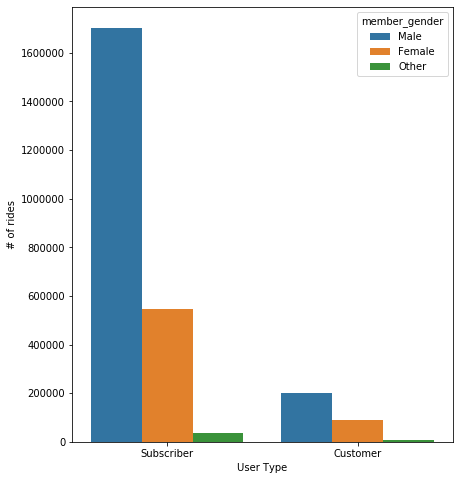

In [5]:
# no of bike trips vs user type with category filters as gender

plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)

g = sns.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('# of rides');

## Age Distribution of users

Its good to see that all genders have equal age distribution also for user types. But subscribers also have slighly aged persons 40 to 50 years age which is very encouraging.

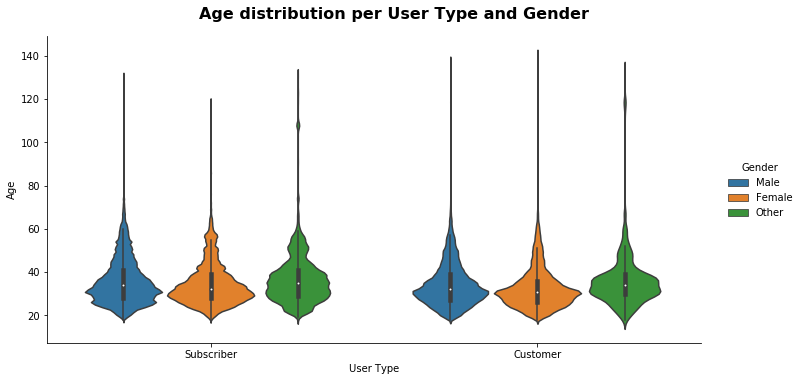

In [6]:
#age distribution per user type and gender

graph = sns.catplot(data=df, x='user_type', y="member_age", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Age")
graph._legend.set_title('Gender')
graph.fig.suptitle('Age distribution per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

## Ride Duration of users

Subscriber tend to have less ride hour as they mainly commute to office or educational institute, so they have a fixed distance. While customers have rather more ride durations as compared to customers beacuse they are mainly tourists or casual travellers.

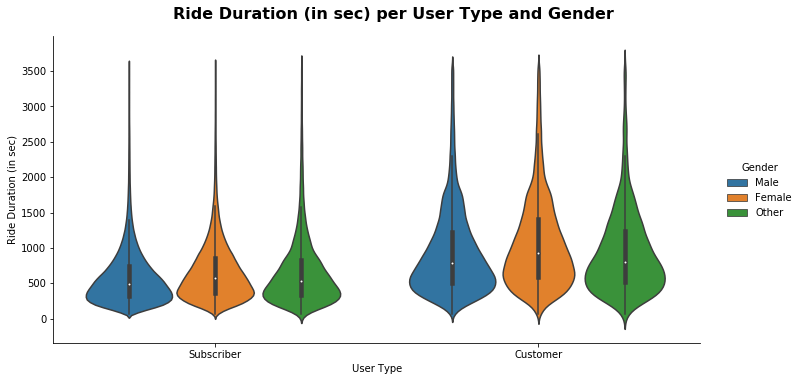

In [7]:
#ride duration per user type and gender

graph = sns.catplot(data=df.query('duration_sec < 3600'), x='user_type', y="duration_sec", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Ride Duration (in sec)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ride Duration (in sec) per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

## Time frame for FordGo Bikes

Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weekends, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.

Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm.

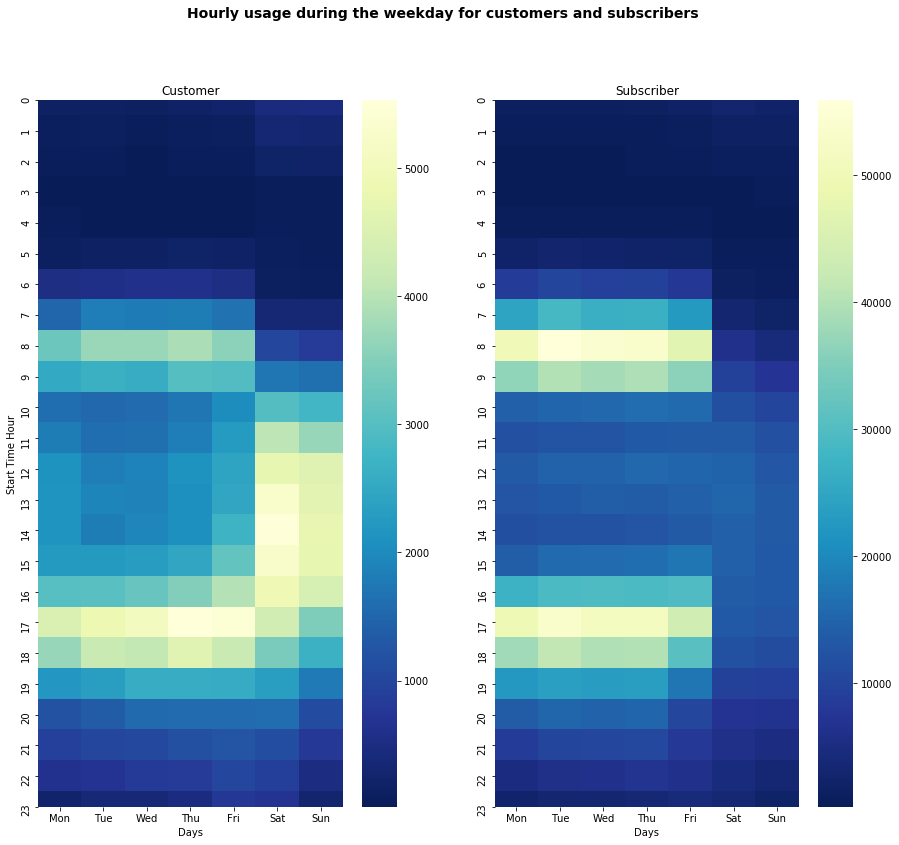

In [8]:
# weekday order

df['start_time_day'] = pd.Categorical(df['start_time_day'],categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(15,13))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(df_customer, cmap='YlGnBu_r')

plt.title("Customer", y=1.015)
plt.xlabel('Days')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(df_subscriber, cmap='YlGnBu_r')

plt.title("Subscriber", y=1.015)
plt.xlabel('Days')
plt.ylabel('');